#METHOD 1

Triple Exponential Smoothing (Holt’s Winter Method)

Holt’s Winter Method also known as Triple Exponential Smoothing is applied when there is Non-Linear Seasonality. It applies the exponential smoothing to that seasonal components in addition to trend and level. A complete cycle of seasons sums up to 1 year including summer, fall, winter and spring. So it might happen that not always all the seasons have the same duration. This means winter lasts for a longer duration and summer can be smaller, but the temperature within that cycle follows a specific pattern i.e. they are repeating. So, it is used when there is no clear pattern identified in the Time Series. The seasonal factor is taken based on how the data repeats itself. Triple exponential is just like exponential Smoothing with an extra parameter added for the seasonality of time series.  So the three equations included in triple exponential smoothing.
The terms which are associated with Triple exponential smoothing are:

   1)Season: When a series seems to be repeating after a regular interval, then the interval is known as season and the series is said to be seasonal.
    
   2)Seasonal Length: It is defined as the number of data points in each season.
Seasonal Component:  It can be identified as an additional deviation from series and trend which repeats in each season. There is one seasonal component for each data point in the season.

   3)Seasonal Component:  It can be identified as an additional deviation from series and trend which repeats in each season. There is one seasonal component for each data point in the season.
    
   a)Series: The Smoothing factor is "α" : The first equation holds true for the current time period, and is a weighted average of the current data value divided by the seasonal factor and the average from the last period adjusted for the trend for the previous period. 

   "S" _"t "  "= α" ("D" _"t" ¦"C" _"t-N"  )"+" ("1-α" )("S" _"t-1 "  "-" "G" _"t-1 "  )

   b)Linear Trend:  The smoothing factor is "β" . The second equation is the calculated trend value and can be obtained using weighted average of the difference between current average and previous average and the trend for the previous time period. 

   G_"t "  "= β" ("S" _"t "  "-" S_"t-1 "  )"+" ("1-β" )("G" _"t-1 "  )

   c)Seasonality: The smoothing factor is "γ" .  The third equation is the calculated seasonal index, and is the weighted average of the seasonal index from the last period and the current data value divided by the current season average.
   
   "C" _"t "  "= γ" ("D" _"t" ¦S_"t"  )"+(1-γ)" ("C" _"t-N "  )

where;

Alpha: Smoothing factor for the Series.
Beta: Smoothing factor for the Trend.
Gamma: Smoothing factor for the seasonality.
"C" _"t " : Seasonal Factor
"S" _"t "∶  Estimate of the customer demand in next period.

As our data shows seasonality this method is best for forecasting. The link between the client and therefore the order placed by the client in monthly has no clear pattern, but we have a cycle of a continuing one month therefore the seasonality remains non-linear but the duration for every cycle remains constant(1 month). Here prediction of order quantity depends on the client and material which they order on a date. Therefore, we want to think about the seasonality and trend and do exponential smoothing. As we analyze the expected values, we will see that by applying the proper trend and seasonality we retrieve solutions. Also, the basics mean the squared error is employed because it defines the accuracy of the forecasted values.




In [ ]:
#Importing all the required libraries for Forecasting the given-data
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.metrics import mean_squared_error #To find the accuracy of the forecast
from math import sqrt                          #To find the accuracy of the forecast
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16,10

In [ ]:
#Calling the given-data (.csv format)
data = pd.read_csv("APS1017 Order data for Project1.csv", parse_dates=['Date'], infer_datetime_format = True)

In [ ]:
#Removing the duplicate data
data[data.duplicated()]

,Date,Client,Order_Quantity,Material
59,2019-12-05,c7,120,12222902
82,2019-12-10,c4,112,12396696
139,2019-12-19,c3,48,12222902
149,2019-12-19,c5,210,12322779
158,2019-12-21,c4,252,12321895
...,...,...,...,...
2722,2020-02-21,c1,104,12246740
2728,2020-02-21,c3,96,12222902
2729,2020-02-21,c4,28,12396696
2731,2020-02-21,c2,42,12395525


In [ ]:
data.drop_duplicates(keep="first",inplace=True) 
data.shape

(2448, 4)

In [ ]:
#Printing head
print(data.head())

        Date Client  Order_Quantity  Material
0 2020-01-27     c9           11712  12293768
1 2020-01-15     c9            6895  12246740
2 2020-01-29     c4             504  12321896
3 2019-12-18     c3             189  12042081
4 2019-12-18     c3             110  11000851


In [ ]:
#Printing tail
print(data.tail())

           Date Client  Order_Quantity  Material
2768 2020-02-24     c2             240  12222902
2769 2020-02-24     c1             168  12395525
2770 2020-02-24     c1              66  12271469
2771 2020-02-24     c1             540  12293783
2772 2020-02-24     c1              35  12404641


In [ ]:
#Creating train and test set 

train=data[0:1958]   #Train is assumed to be 80% of the given data
test=data[1958:2448] #Test is assumed to be 20% of the given data

In [ ]:
#Printing dates to visualize the sorting of the given-data
data["Date"]

0      2020-01-27
1      2020-01-15
2      2020-01-29
3      2019-12-18
4      2019-12-18
          ...    
2768   2020-02-24
2769   2020-02-24
2770   2020-02-24
2771   2020-02-24
2772   2020-02-24
Name: Date, Length: 2448, dtype: datetime64[ns]

In [ ]:
#Printing the train values
train=data[0:1958]
print(train)

           Date Client  Order_Quantity  Material
0    2020-01-27     c9           11712  12293768
1    2020-01-15     c9            6895  12246740
2    2020-01-29     c4             504  12321896
3    2019-12-18     c3             189  12042081
4    2019-12-18     c3             110  11000851
...         ...    ...             ...       ...
2217 2020-02-10     c6              21  12042081
2218 2020-02-10     c6              48  12222902
2219 2020-02-10     c6              42  11001186
2220 2020-02-10     c6              22  11000851
2221 2020-02-10     c3             220  12320618

[1958 rows x 4 columns]


In [ ]:
#Printing the test values
test=data[1958:2448]
print(test)

           Date Client  Order_Quantity  Material
2222 2020-02-11     c3              33  11000851
2223 2020-02-11     c3              63  11001186
2224 2020-02-11     c3              22  11000858
2226 2020-02-10     c5              48  12222902
2227 2020-02-10     c5             126  12042081
...         ...    ...             ...       ...
2768 2020-02-24     c2             240  12222902
2769 2020-02-24     c1             168  12395525
2770 2020-02-24     c1              66  12271469
2771 2020-02-24     c1             540  12293783
2772 2020-02-24     c1              35  12404641

[490 rows x 4 columns]


In [ ]:
#Calling the statsmodel library to perform the Exponential Smoothing fuction
from statsmodels.tsa.api import ExponentialSmoothing

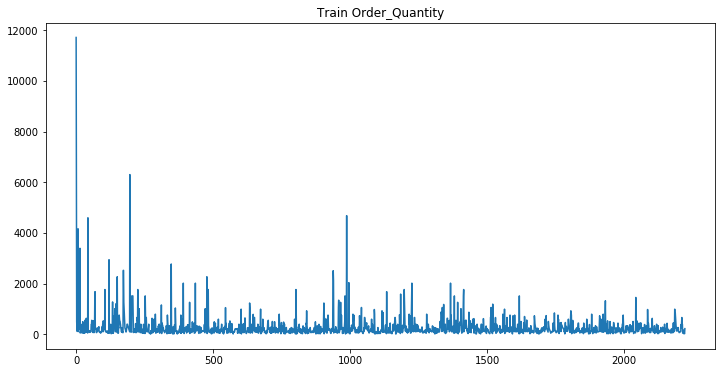

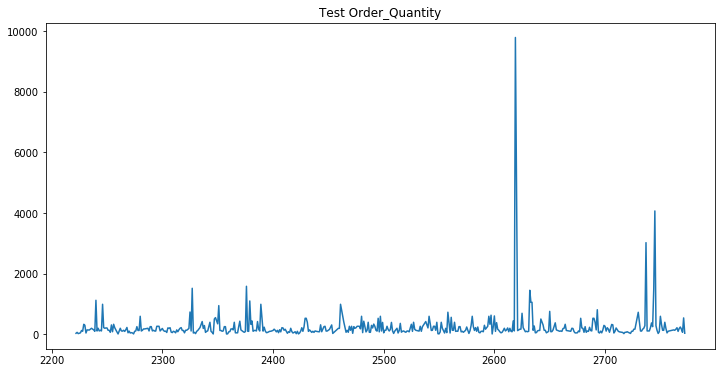

In [ ]:
#Plotting Train and Test 
train.Order_Quantity.plot(figsize=(12,6), title= 'Train Order_Quantity', fontsize=10)
plt.show()
test.Order_Quantity.plot(figsize=(12,6), title= 'Test Order_Quantity', fontsize=10)
plt.show()

C:\Users\krima\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


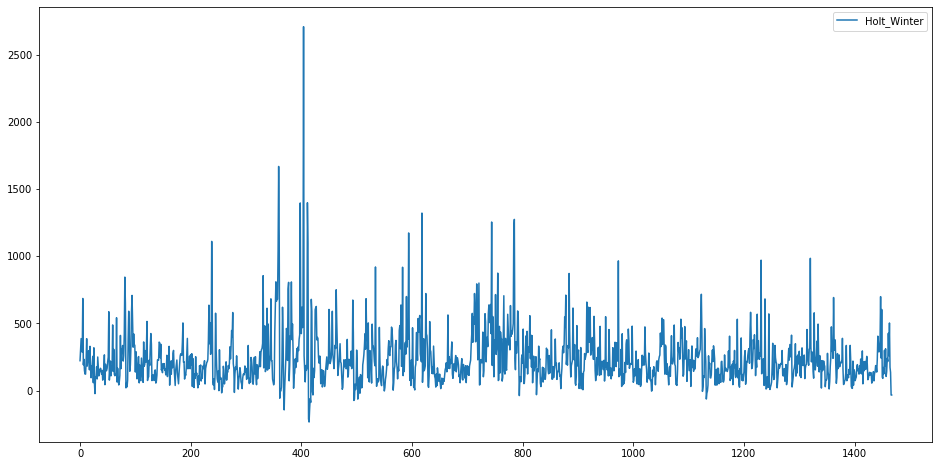

In [ ]:
#Performing exponential smoothing using Holt-Winter's method and forecasting 
ypred = test.copy() #Initializing thr test copy values to the prediction values
fit1 = ExponentialSmoothing(np.asarray(train['Order_Quantity']) ,seasonal_periods=7 ,trend='add', seasonal='add').fit()
ypred = fit1.predict(len(test))
plt.figure(figsize=(16,8))
#plt.plot( train['Order_Quantity'], label='Train')
#plt.plot(test['Order_Quantity'], label='Test')
plt.plot(ypred, label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
#Measuring the accuracy
#rms = np.sqrt(mean_squared_error(test.Order_Quantity, ypred))
#print(rms)

In [ ]:
print(ypred)

[298.53927942 387.39185891 367.04590578 ... 152.21381693  85.88979982
  52.61721637]


#METHOD 2: 

MULTIVARIABLE REGRESSION ANALYSIS

The second method used is Multivariable Regression Analysis for forecasting model for the given data. The multi-variable regression model is an extension of the linear regression model as this technique considers more than one outcome variable. The statistical goal for the use of this model is to produce the model in the form of linear regression along with identifying the best weighted linear combination of each independent variable in the data to optimally predict the output variable. This model is suited for the given case as there are two independent variables in the data, Clients and Materials. 
The model can capture the essential patterns, like (1) Trend and (2) Seasonality, in the statistical model to improve the forecasting. The trend is a steady movement of time series in a particular direction. They are frequently seen and are of practical importance. Trends can be either linear or non-linear. 

1)Trend
  a) Linear trends: Trend with a steady increment or decrement in the variable value over a period of time is known as linear trend. Mathematically, the linear trend can be estimated by 
                                                    
                                                       y_t=a+b*t

where t is the trend added to the regression as an explanatory variable.
	
  b) Non-linear trends: If the rate of increase of decrease of the variable output, over a period of time, is unsteady then the trend is defined as non-linear. The non-linear trend can be quadratic, cubic, or exponential. 
	
  c) Quadratic trend: They are a form of polynomial or order of 2

                                                     y_t=a+b*t+c*t^2

where t is the trend and t2 is the squared trend added to the regression as an explanatory variable.


  d) Cubic trend: They are a form of polynomial or order of 3

                                                  y_t=a+b*t+c*t^2+d*t^3

where t is the trend, t2 is the squared trend and t3 is the cubic trend added to the regression as an explanatory variable.


   e) Exponential trend: this is the trend best suited for rapid increase or decrease of the data series

                                                      y_t=e^(a+b*t)
                                                    〖ln⁡(y〗_t)=a+b*t
where t is the trend added to the regression as an explanatory variable.


2)Seasonality

Variables are also affected by the regularity of its occurrence with respect to time. Product sales and other variables which are agricultural based will depend on their harvesting seasons. Sales of some products will depend on the weather, holidays, start of school years, etc. respectively. As a result, we encounter a pattern in the data series that relates to a particular season, which can be hours of the day, days of the week or month of the year. In such cases, to improve the accuracy of the forecasting model, we consider the seasonality factor and its variation in the time series.
The main idea used by multivariable regression analysis is to combine the changes in trend and seasonality to give a more accurate result. 
                                                   
                                           y_t=TREND+SEASONALITY
                                           
Multi-variable regression analysis and Winter’s Method is similar in terms of capturing trend and seasonality. However, the difference between the two methods is seen in the results of their forecasts. Multi-variable regression analysis is the most suitable forecasting method for short-term forecasting i.e. daily, weekly, or monthly short-term forecasting. Whereas, Winter’s method is more suitable for long-term forecasting i.e. monthly or yearly long-term forecasting.
The use of these methods is suited for the given data series as there are two independent variables, namely clients (10) and materials (20). The trend is non-linear, and the selection of the appropriate trend will be based on the best result obtained after the incorporation of each trend in the data series. 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns #data visualization library
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.vector_ar.var_model import VAR     #Using multivariable auto-regression method with client and material as 2 variables
from sklearn.metrics import mean_squared_error          #To find the accuracy 
from statsmodels.sandbox.regression.predstd import wls_prediction_std   
from math import sqrt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16,10

In [ ]:
data = pd.read_csv("APS1017 Order data for Project.csv", parse_dates=['Date'], infer_datetime_format = True) #extracting .csv file

In [ ]:
data.shape

(2773, 4)

In [ ]:
data.head(10)

,Date,Client,Order Quantity,Material
0,2020-01-27,c9,11712,12293768
1,2020-01-15,c9,6895,12246740
2,2020-01-29,c4,504,12321896
3,2019-12-18,c3,189,12042081
4,2019-12-18,c3,110,11000851
5,2019-12-18,c3,396,11000858
6,2019-12-18,c3,315,11001186
7,2020-01-27,c9,4160,12293768
8,2019-12-30,c2,104,12246740
9,2020-02-21,c8,1386,11000858


In [ ]:
data.dtypes

Date              datetime64[ns]
Client                    object
Order Quantity             int64
Material                   int64
dtype: object

In [ ]:
data[data.duplicated()] # Number of dpulicate values in taken data

,Date,Client,Order Quantity,Material
59,2019-12-05,c7,120,12222902
82,2019-12-10,c4,112,12396696
139,2019-12-19,c3,48,12222902
149,2019-12-19,c5,210,12322779
158,2019-12-21,c4,252,12321895
...,...,...,...,...
2722,2020-02-21,c1,104,12246740
2728,2020-02-21,c3,96,12222902
2729,2020-02-21,c4,28,12396696
2731,2020-02-21,c2,42,12395525


In [ ]:
data.drop_duplicates(keep="first",inplace=True)  #Dropping all the 325 duplicate values
data.shape

(2448, 4)

In [ ]:
data.head(20)

,Date,Client,Order Quantity,Material
0,2020-01-27,c9,11712,12293768
1,2020-01-15,c9,6895,12246740
2,2020-01-29,c4,504,12321896
3,2019-12-18,c3,189,12042081
4,2019-12-18,c3,110,11000851
5,2019-12-18,c3,396,11000858
6,2019-12-18,c3,315,11001186
7,2020-01-27,c9,4160,12293768
8,2019-12-30,c2,104,12246740
9,2020-02-21,c8,1386,11000858


In [ ]:
df = data.groupby(['Date','Client','Material'],as_index=False).agg({'Order Quantity': 'sum'}) #Taking the aggregate

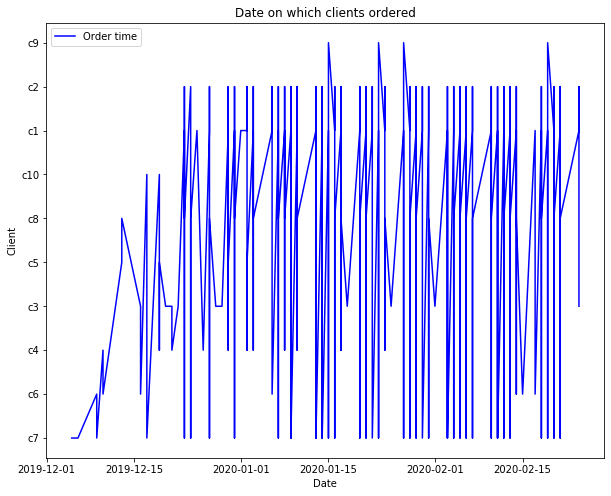

In [ ]:
#Plotting Date vs Client

plt.figure(figsize=(10, 8))
plt.plot(df['Date'], df['Client'], 'b-', label = 'Order time')
plt.xlabel('Date'); plt.ylabel('Client'); plt.title('Date on which clients ordered')
plt.legend();

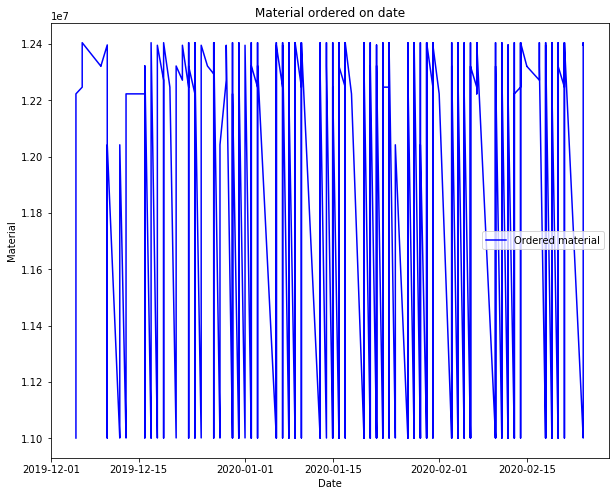

In [ ]:
#Plotting Date vs Material

plt.figure(figsize=(10, 8))
plt.plot(df['Date'], df['Material'], 'b-', label = 'Ordered material')
plt.xlabel('Date'); plt.ylabel('Material'); plt.title('Material ordered on date')
plt.legend();

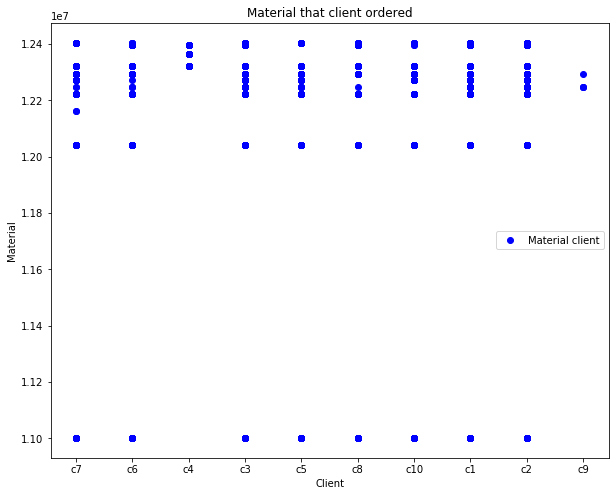

In [ ]:
#Plotting Client vs Material

plt.figure(figsize=(10, 8))
plt.plot(df['Client'], df['Material'], 'bo', label = 'Material client')
plt.xlabel('Client'); plt.ylabel('Material'); plt.title('Material that client ordered')
plt.legend();

In [ ]:
df.head(10)

,Date,Client,Material,Order Quantity
0,2019-12-05,c7,11000851,660
1,2019-12-05,c7,11000858,297
2,2019-12-05,c7,11001186,504
3,2019-12-05,c7,12042081,504
4,2019-12-05,c7,12222902,192
5,2019-12-06,c7,12246740,65
6,2019-12-06,c7,12271469,1848
7,2019-12-06,c7,12322779,1995
8,2019-12-06,c7,12404641,98
9,2019-12-09,c6,12320618,264


In [ ]:
df['Date'][0].month

12

In [ ]:
df.shape

(1692, 4)

In [ ]:
df['Client'].value_counts()

c1     369
c3     317
c2     292
c7     163
c6     120
c8     116
c5     110
c10    107
c4      94
c9       4
Name: Client, dtype: int64

In [ ]:
df['Material'].value_counts()

12222902    157
12042081    119
11000851    118
12293783    117
11000858    116
12395525    110
12271469    108
11001186    107
12293768     99
12322779     96
12404641     95
12320619     95
12320618     94
12320670     92
12246740     73
12396696     38
12365978     28
12321896     14
12321895     14
12160666      2
Name: Material, dtype: int64

In [ ]:
ck = []
k=1
for i in range(len(df)):
    
    if i == 0:
        ck.append(k)
    else:
        if (df['Date'][i]-df['Date'][i-1]).days ==0:
            ck.append(ck[i-1])
        else:
            ck.append((df['Date'][i]-df['Date'][0]).days)
            

In [ ]:
ck[0:10]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 4]

In [ ]:
df['Trend']=ck

In [ ]:
df['Month']=[df['Date'][i].month for i in range(len(df))]

In [ ]:
df.head(10)

,Date,Client,Material,Order Quantity,Trend,Month
0,2019-12-05,c7,11000851,660,1,12
1,2019-12-05,c7,11000858,297,1,12
2,2019-12-05,c7,11001186,504,1,12
3,2019-12-05,c7,12042081,504,1,12
4,2019-12-05,c7,12222902,192,1,12
5,2019-12-06,c7,12246740,65,1,12
6,2019-12-06,c7,12271469,1848,1,12
7,2019-12-06,c7,12322779,1995,1,12
8,2019-12-06,c7,12404641,98,1,12
9,2019-12-09,c6,12320618,264,4,12


In [ ]:
df.head()

,Date,Client,Material,Order Quantity,Trend,Month
0,2019-12-05,c7,11000851,660,1,12
1,2019-12-05,c7,11000858,297,1,12
2,2019-12-05,c7,11001186,504,1,12
3,2019-12-05,c7,12042081,504,1,12
4,2019-12-05,c7,12222902,192,1,12


In [ ]:
dfdummy = pd.get_dummies(df, columns=['Client',"Material", 'Month'],drop_first=True) #Creating dummy variable to get particular client, material and date when user inputs.

In [ ]:
dfdummy.head(10)

,Date,Order Quantity,Trend,Client_c10,Client_c2,Client_c3,Client_c4,Client_c5,Client_c6,Client_c7,...,Material_12320670,Material_12321895,Material_12321896,Material_12322779,Material_12365978,Material_12395525,Material_12396696,Material_12404641,Month_2,Month_12
0,2019-12-05,660,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,2019-12-05,297,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,2019-12-05,504,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,2019-12-05,504,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,2019-12-05,192,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5,2019-12-06,65,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
6,2019-12-06,1848,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
7,2019-12-06,1995,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
8,2019-12-06,98,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
9,2019-12-09,264,4,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
#dfdummy = pd.get_dummies(df, columns=['Client',"Material", 'Month'],drop_first=True)
dfdummy.columns

Index(['Date', 'Order Quantity', 'Trend', 'Client_c10', 'Client_c2',
       'Client_c3', 'Client_c4', 'Client_c5', 'Client_c6', 'Client_c7',
       'Client_c8', 'Client_c9', 'Material_11000858', 'Material_11001186',
       'Material_12042081', 'Material_12160666', 'Material_12222902',
       'Material_12246740', 'Material_12271469', 'Material_12293768',
       'Material_12293783', 'Material_12320618', 'Material_12320619',
       'Material_12320670', 'Material_12321895', 'Material_12321896',
       'Material_12322779', 'Material_12365978', 'Material_12395525',
       'Material_12396696', 'Material_12404641', 'Month_2', 'Month_12'],
      dtype='object')

In [ ]:
import statsmodels.api as sm
dfdummy = pd.get_dummies(df, columns=['Client',"Material", 'Month'],drop_first=True)

In [ ]:
var1 = ['Trend', 'Client_c10', 'Client_c2',
       'Client_c3', 'Client_c4', 'Client_c5', 'Client_c6', 'Client_c7',
       'Client_c8', 'Client_c9', 'Material_11000858', 'Material_11001186',
       'Material_12042081', 'Material_12160666', 'Material_12222902',
       'Material_12246740', 'Material_12271469', 'Material_12293768',
       'Material_12293783', 'Material_12320618', 'Material_12320619',
       'Material_12320670', 'Material_12321895', 'Material_12321896',
       'Material_12322779', 'Material_12365978', 'Material_12395525',
       'Material_12396696', 'Material_12404641', 'Month_2', 'Month_12']
X = sm.add_constant(dfdummy[var1]) # sm is used from the Statsmodel library 
Y = dfdummy['Order Quantity']
est = sm.OLS(Y, X)                 # Assigning to est variable to generate the Ordinary List Squares of X and Y
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:         Order Quantity   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     60.48
Date:                Sat, 18 Jul 2020   Prob (F-statistic):          5.73e-241
Time:                        07:53:05   Log-Likelihood:                -13299.
No. Observations:                1692   AIC:                         2.666e+04
Df Residuals:                    1661   BIC:                         2.683e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               230.2373    113.31

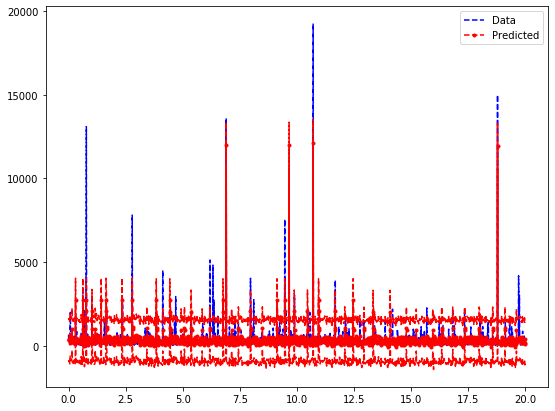

In [ ]:
#Plotting the Data and Predicted OLS results

nsample=1692
x = np.linspace(0, 20, nsample)
prstd, iv_l, iv_u = wls_prediction_std(est2) #weighted least square regression(wls)
fig= plt.subplots(figsize=(9,7))
plt.plot(x, Y, 'b--', label='Data')
plt.plot(x, est2.fittedvalues, 'r--.', label='Predicted')
plt.plot(x, iv_u, 'r--')
plt.plot(x, iv_l, 'r--')
plt.legend(loc='best');

In [ ]:
# Creating user inputs

d = input("Enter a date in YYYY-MM-DD format")
c = input("Enter Client : ")
m = input("Enter Material : ")
df = pd.DataFrame({"Date": d, "Client": c,"Material": m}, index=[0])
df

Enter a date in YYYY-MM-DD format2021-01-27
Enter Client : c9
Enter Material : 12293768


,Date,Client,Material
0,2021-01-27,c9,12293768


In [ ]:
year, month, day = map(int, d.split('-'))
date1 = datetime.date(year, month, day)

In [ ]:
date1

datetime.date(2021, 1, 27)

In [ ]:
from datetime import date
start_date = date(2019, 5, 12)

In [ ]:
trend = (date1-start_date).days

In [ ]:
month = date1.month

In [ ]:
# Root Mean Squared Error to find the accuracy of the prediction

print("rsquared\n",est2.rsquared)

rsquared
 0.52206111816398


In [ ]:
ypred = est2.predict(X)    #Prediction
print(ypred)

0       375.207493
1       314.169363
2       367.829918
3       335.541215
4       286.640811
           ...    
1687    233.900518
1688    148.363318
1689    422.597169
1690    105.162726
1691    178.018051
Length: 1692, dtype: float64


In [ ]:
xpred = (date1-start_date).days    #Predicting the order quantity on particular date for particular client and particular material

In [ ]:
print (xpred)

626


EXPLANATION AND VISUALIZATION OF DATA:

The given data shows that we have clients ranging from 1 to 10 who ordered different materials with given id at different dates. The data provided is from December 2019 to February 2020, on which we were supposed to do the forecast for the order quantity ordered by a particular client at a given date. The data are given shows very random values of order quantity along with many duplicated values. Therefore, we removed the 325 duplicated values we got and forecasted on remaining 2448 values of data. Also, we observed that on a particular day, the same client ordered the same material with different order quantity while some clients didn't order at all. Therefore, taking aggregate at that point of all the given materials and clients if needed, we analyzed the data. As seen, the graph between date versus client, date versus given material, client versus material, OLS regression and data, train, and test, and plotting the predicted values from the winters holt method. We can see that date versus client graph, date versus material graph shows a similar kind of trend where the design repeats itself after a particular interval. Also, the graph of client versus material also shows how clients have ordered particular material in a pattern formed. The plot of OLS versus the data given indicates the predicted values with root mean squared error from the OLS regression model as 52%. While in Winter's Holt's method as we divided the data into test and train that is 80% assigned to train and 20% to test we can see the difference as train data has the values from 2019 December when more quantity was ordered and the test has data where the end of march the quantity ordered was somewhat higher than in between. This clearly shows how the ordered quantity varied from December to March. The predicted values graph shows similar results where the next year the same kind of trend will be obtained with some changes with respect to given data. Thus by both the methods the predicted values obtained are with some difference. Also, the multivariable regression methods allow the user inputs in order to predict the particular data.

EXPLANATION AND USE OF MAJOR FUNCTIONS IN CODE:

The data consisted of duplicate values which were dropped for the better analysis. The exponential smoothing function was imported from the Statsmodel library. In this we used the Order Quantity from the train data specifying the particular trend, seasonal period and seasonal and fitted the model accordingly. We trained the model to predict the forecast using the test data and plotted the forecasted values by implementing Holt-Winter’s method. 
A loop was generated across the given data in order to obtain the respective values which were further utilized for the predictions. Later, dummy a function was used to select a particular data at a given point of time and the rest were assigned False (0) in order to achieve the required output from the given set of data. Ordinarily Least Squares (OLS) was used to define the relation between our multivariable. Fit function was used to adjust weights for data to obtain better accuracy. Weighted least square regression (wls) was used to plot the OLS results. Information about Date, Client and Material was obtained from the user input to achieve the forecast of the respective input. The predict function was used to forecast using the obtained trained OLS model.  

SUMMARY

Forecasting is crucial as it helps to ensure that one has enough supply on hand to meet the demands. An overestimation of demand may lead to excessive inventory and high costs. Whereas, underestimating demand means the customers' needs won't be satisfied.
There are mainly two types of forecasting methods, one is qualitative forecasting method, and another is the quantitative forecasting method.
The qualitative forecasting method uses subjective inputs and the quantitative forecasting method consists of time series method. 
In this project, the data given to us requires to follow the Time-Series analysis method. It uses the chronologically arranged data for the forecasting. Time-series method helps in forecasting by taking the starting period from the past and helps in predicting the results in the future.
The Multivariable Regression Analysis consists of more than one time-dependent variable. These variables are dependent on past values and are inter-dependent on each other as well. These dependencies are used to forecast future results.
The Multivariable Regression Analysis is similar to Holt-Winter's in terms of capturing the trend and seasonality. However, the difference between the two methods is visible in the results of their forecasts. The Multivariable Regression Analysis is suitable for short-term forecastings like daily, weekly or monthly short-term forecastings. On the other hand, Holt-Winter's method is more suitable for long-term forecastings like monthly or yearly long-term forecastings.
These two methods are apt for the given-data because there are two independent variables; Clients and Materials. Also, the trend is non-linear, and the selection of the appropriate trend will be based on the best result obtained after the incorporation of each trend in the data series.